In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv("videojuegos.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [ ]:
df = df.drop(df.columns[:6], axis=1)
df = df.drop("release_date", axis=1)
df = df.drop("last_update", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  6678 non-null   float64
 1   total_sales   18922 non-null  float64
 2   na_sales      12637 non-null  float64
 3   jp_sales      6726 non-null   float64
 4   pal_sales     12824 non-null  float64
 5   other_sales   15128 non-null  float64
dtypes: float64(6)
memory usage: 2.9 MB


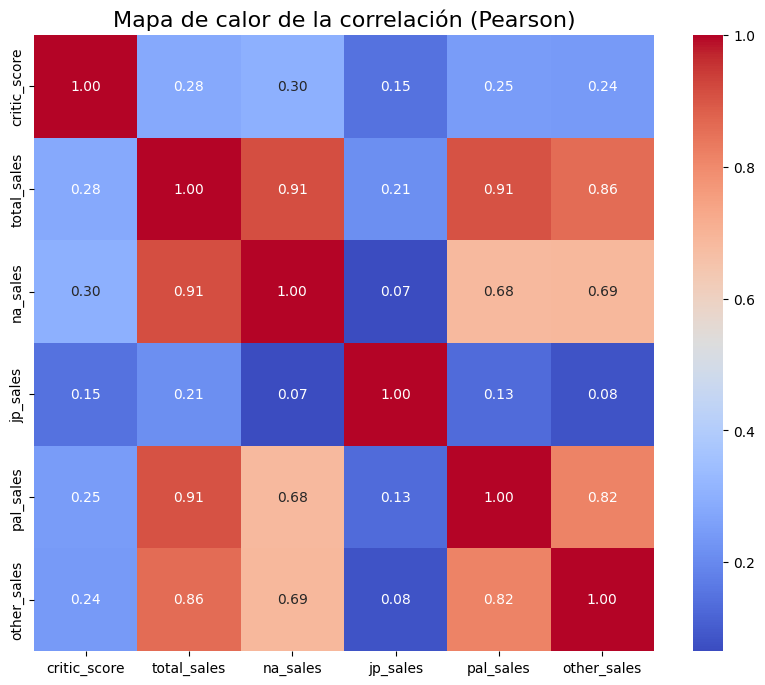

In [ ]:

correlacion = df.corr()


plt.figure(figsize=(10, 8))


sns.heatmap(correlacion, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Mapa de calor de la correlación (Pearson)", fontsize=16)

plt.show()

Podemos usar "total sales" para representr a los demas "sales", debido a que este tiene un indice de Pearson de 0.82 o mayor, esto simplifica los datos relevantes a solo 2.

In [ ]:
df = df.drop("pal_sales", axis=1)
df = df.drop("other_sales", axis=1)
df = df.drop("jp_sales", axis=1)
df = df.drop("na_sales", axis=1)
df = df.dropna(subset=['total_sales', 'critic_score'], how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4126 entries, 0 to 18919
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  4126 non-null   float64
 1   total_sales   4126 non-null   float64
dtypes: float64(2)
memory usage: 96.7 KB


Eliminamos las variables "sales" redundantes, y los datos que tengan un valor uno en una o ambas variables con las que se van a trabajar

In [ ]:
df['class'] = df['critic_score'].apply(lambda x: 3 if x == 10 else int(x // (10/3)))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 4126 entries, 0 to 18919
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   critic_score  4126 non-null   float64
 1   total_sales   4126 non-null   float64
 2   class         4126 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 128.9 KB


,critic_score,total_sales,class
0,9.4,20.32,2
1,9.7,19.39,2
2,9.6,16.15,2
4,8.1,15.09,2
5,8.7,14.82,2


Creamos la columna "class" para separar los juegos en 3 clases segun su aceptacion, y usar esta etiqueta para entrenar el modelo

In [ ]:
X = df[['critic_score']]
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

# Crear y entrenar el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=666)
model.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = model.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00       818

    accuracy                           1.00      1238
   macro avg       1.00      1.00      1.00      1238
weighted avg       1.00      1.00      1.00      1238



Del analisis de exactitud podemos ver que el modelo es capaz de clasificar los juegos en 3 clases, que se dividen segun su puntaje de la critica, pero usando las ventas en su lugar